In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('Superstore.csv', encoding='latin-1')

In [24]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df.shape

(9994, 21)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
def clean_and_separate(df):
    df.drop(['Row ID', 'Country', 'Customer Name'], axis = 1, inplace = True)
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d-%m-%Y')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d-%m-%Y')
    df['Ship Year'] = df['Ship Date'].dt.year
    df['Ship Month'] = df['Ship Date'].dt.month
    df['Ship Day'] = df['Ship Date'].dt.day
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Day'] = df['Order Date'].dt.day
    df['Price per Piece'] = df['Sales'] / df['Quantity']
    df['Profit per Piece'] = df['Profit'] / df['Quantity']
    df['Lieferzeit'] = (df['Ship Date'] - df['Order Date']).dt.days
    return df
df = clean_and_separate(df)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,...,Sales,Quantity,Discount,Profit,Ship Year,Ship Month,Ship Day,Order Year,Order Month,Order Day
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,261.9600,2,0.00,41.9136,2013,11,12,2013,11,9
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,731.9400,3,0.00,219.5820,2013,11,12,2013,11,9
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,...,14.6200,2,0.00,6.8714,2013,6,17,2013,6,13
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,957.5775,5,0.45,-383.0310,2012,10,18,2012,10,11
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,22.3680,2,0.20,2.5164,2012,10,18,2012,10,11


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   City          9994 non-null   object        
 7   State         9994 non-null   object        
 8   Postal Code   9994 non-null   int64         
 9   Region        9994 non-null   object        
 10  Product ID    9994 non-null   object        
 11  Category      9994 non-null   object        
 12  Sub-Category  9994 non-null   object        
 13  Product Name  9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

<Axes: ylabel='count'>

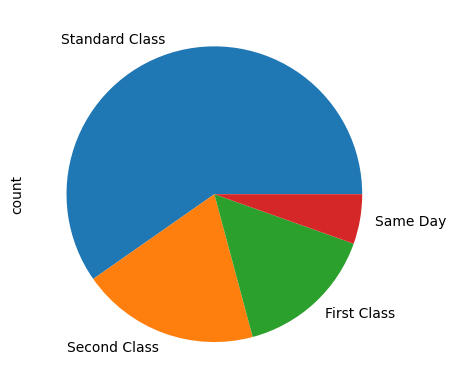

In [28]:
df['Ship Mode'].value_counts().plot(kind = 'pie')